In [ ]:
import numpy as np
import os
from datetime import datetime
import pandas as pd
import dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objs as go

os.chdir("/Users/Philip/Documents/NU Econ PhD/Scraper")
df = pd.read_csv("dfMay-10.csv")

ids =[
    6731,666,5788,6188,6424,5527,2669,6414,619,6296,6357,6336,5535,616,6191,6427,5883,679,
    676,5344,438,5919,5596,5179,4951,4874,5474,6146,6356,568,6351,515,6371,5834,542,6199,
    684,5427,671,419,635,642,5774,5813,6177,6359,2766,2839,4817,4887,5189,5285,5319,546,
    5472,5493,5512,5523,5585,5674,5737,5742,5794,5843,5854,674,618,612,6151,6222,623,6243,
    6266,6277,63,6321,6334,6338,6346,6367,6374,6377,674,679,6345,6426,5754,5931,5698,4977,
    6341,5451,484,699,569,5685,6731]
df = df[df['ID'].isin(ids)]

df_test2=df.groupby(['Ancestry','Date']  ).agg({'IUI Number': ['mean','count']}).reset_index() #can change to std for variance

df_test2.columns = ['Ancestry','Date','IUI Number','Count']
df_test2 = df_test2.reset_index(col_level =1)
#print(df_test2)
#df_test2.to_csv('mean_count_trend.csv')


#print(df_test2.head(60))
fig=px.line(df_test2, x='Date',y='IUI Number', color='Ancestry') 
#fig.write_image("fig2.png")
fig
#px.bar(df_test2, x='Date',y='IUI Number', color='Ancestry',barmode='group')

In [ ]:
px.bar(df1, x='Date',y='IUI Number', color='Ancestry',barmode='group')

In [128]:
from datetime import datetime
import os
import pandas as pd
today = datetime.now()
date1 = today.strftime("%b-%d")
num_days = 68
os.chdir("/Users/Philip/Documents/NU Econ PhD/Scraper")
df = pd.read_csv("dfMay-10.csv")
df = df[['Ancestry', 'IUI Number','Date','Religion','ID']]
df= df.sort_values(by=['ID', 'Date'], ascending=True)
for i in range(num_days): #fix number of days
    df["lead(IUI Number ",i] = df.groupby('ID')['IUI Number'].shift(-i)
df_lag=df.groupby('ID').first().reset_index()
df_lag.to_csv('transactions_first%s.csv' %date1)
transactions = pd.DataFrame(df_lag)
for i in range(num_days-1):
    transactions["Delta %d" % (i+1)]=df_lag.iloc[:,i+6]-df_lag.iloc[:,i+5]
transactions_delta = transactions[transactions.columns.drop(list(transactions.filter(regex='lead')))]
transactions_delta.to_csv('deltas.csv')

In [129]:
#means=transactions_delta.iloc[:,5:]
cols = transactions_delta.columns[5:]
means = transactions_delta[cols]
means['Ancestry']= transactions_delta.iloc[:,1]
means['mean'] = means.iloc[:,:66].mean(axis=1)
means.groupby('Ancestry').mean()

<ipython-input-129-b67684e24ef3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-b67684e24ef3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Delta 1,Delta 2,Delta 3,Delta 4,Delta 5,Delta 6,Delta 7,Delta 8,Delta 9,Delta 10,...,Delta 59,Delta 60,Delta 61,Delta 62,Delta 63,Delta 64,Delta 65,Delta 66,Delta 67,mean
Ancestry,,,,,,,,,,,,,,,,,,,,,
Asian,0.000000,-0.064103,0.000000,0.000000,0.000000,0.000000,-0.012821,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.002433
Black,-0.733333,0.571429,-0.357143,0.000000,0.000000,0.000000,0.000000,-0.076923,0.000000,0.076923,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.233701
Caucasian,-0.148148,0.070093,-0.118483,-0.014423,-0.009615,-0.044335,-0.050251,-0.104712,-0.032086,-0.076087,...,-0.121951,-0.189873,0.064935,-0.012987,-0.103896,-0.067568,-0.135135,0.0,-0.028169,-0.056562
Latino,-0.038462,0.153846,-0.120000,0.000000,-0.083333,0.000000,-0.041667,-0.500000,0.416667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.0,0.000000,-0.040254
Multi,-0.020408,-0.224490,-0.021277,0.000000,-0.106383,-0.170213,-0.021739,0.108696,-0.266667,0.000000,...,0.000000,-0.230769,0.000000,-0.038462,0.000000,0.000000,0.000000,0.0,0.000000,-0.081637


<ipython-input-177-77c5343525ee>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



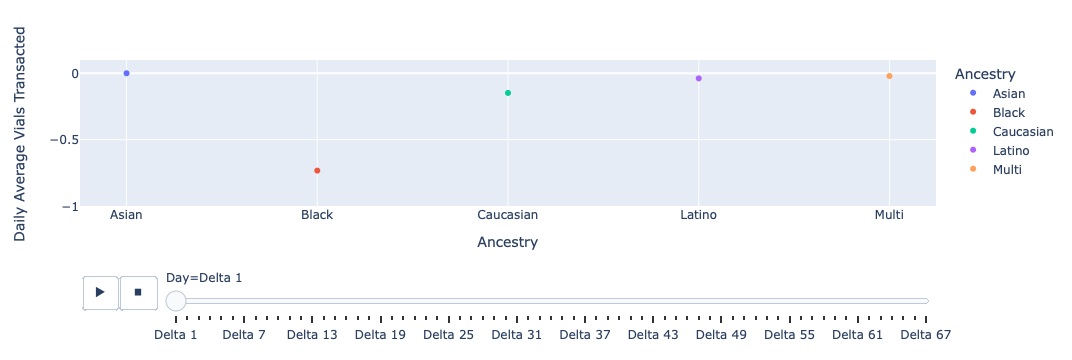

In [177]:
import plotly.express as px
import plotly.graph_objs as go
cols = transactions_delta.columns[5:]
means = transactions_delta[cols]
means['Ancestry']= transactions_delta.iloc[:,1]
#means['mean'] = means.iloc[:,:66].mean(axis=1)
means = means.groupby('Ancestry').mean()

#means.set_index('Ancestry', inplace=True)

means = means.stack().reset_index()
means.columns = ['Ancestry','Delta', 'value']

px.scatter(means, x='Ancestry', y='value', color='Ancestry', animation_frame='Delta',
          labels={
                    "value": "Daily Average Vials Transacted",
                    "Delta": "Day",
                 },range_y=[-1,0.1])

